In [1]:
import pandas as pd
import csv
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

seed_value = 230293944

In [ ]:
colnames = ["Source", "Target", "Rating", "Time"]
df = pd.read_csv(
    "/workspaces/Network-Science/soc-sign-bitcoinalpha.csv", names=colnames, header=None
)

G = nx.from_pandas_edgelist(df, source="Source", target="Target")


num_nodes = G.number_of_nodes()  # Calculate the number of nodes in graph
num_edges = len(df)  # Calculate number of links

# Print number of nodes and edges
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 3783
Number of edges: 24186


### b) (2 marks) Explain the difference between weakly and strongly connected components and find how many of each the network has.

Weakly connected component = Group of nodes within a directed graph where every node is reachable from every other node, but considering the direction of the edges is ignored. This means that if there is a path from node X to node Y, there is also a path from node Y to node X, regardless of the direction of the edges.
To find the weakly connected component, the following code is used.
$$ weakly connected components = list(nx.weakly \ connected \ components(G))            $$


Strong connected component = Subset of nodes in a directed graph such that every node in the subset is reachable from every other node, considering the direction of the edges. This means that there exists a directed path from any node to any other node in the component, and vice versa.
$$ strongly connected components = list(nx.strongly \ connected \ components(G))         $$ 

In [12]:
G = nx.from_pandas_edgelist(df, "Source", "Target", create_using=nx.DiGraph())
wcc = list(nx.weakly_connected_components(G))
num_wcc = len(wcc)

# strongly connected components
scc = list(nx.strongly_connected_components(G))
num_scc = len(scc)

print(f"Number of Weakly Connected Components: {num_wcc}")
print(f"Number of Strongly Connected Components: {num_scc}")

Number of Weakly Connected Components: 5
Number of Strongly Connected Components: 540


### c) (7 marks) Plot the in and out degree distributions of this network, giving the corresponding average values. Relate your results to the nature of the network. 

In [4]:
in_degrees = [G.in_degree(node) for node in G.nodes()]
out_degrees = [G.out_degree(node) for node in G.nodes()]

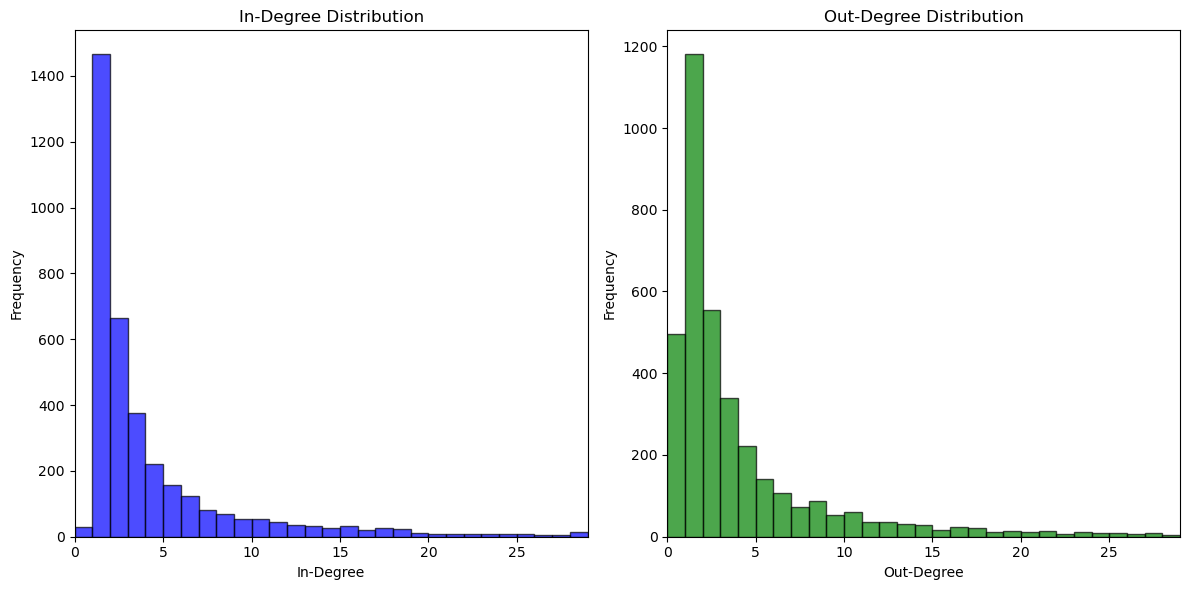

In [5]:
# Plot in-degree distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=np.arange(0, 30, 1), color="blue", alpha=0.7, edgecolor="k")
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.margins(x=0)  # to remove the whitespace between x axis and histogram bar.

# Plot out-degree distribution
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=np.arange(0, 30, 1), color="green", alpha=0.7, edgecolor="k")
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.margins(x=0)  # to remove the whitespace between x axis and histogram bar.
plt.tight_layout()
plt.show()

In [6]:
avg_in_degree = sum(in_degrees) / len(in_degrees)
avg_out_degree = sum(out_degrees) / len(out_degrees)

print(f"Average In-Degree: {avg_in_degree}")
print(f"Average Out-Degree: {avg_out_degree}")

Average In-Degree: 6.393338620142744
Average Out-Degree: 6.393338620142744


Obsvervation and interpretation from the above result graph are as following:

- Number of in degree and number of out degree are same in directed graph.
- We can see that most of the graph is uniformly structured except for few columns of degree. And this uniformity distribution suggest that the graph is very well connected but the graph is not strongly connected but not weakly connected as well.
- Every node can not be both source and target node as very fewer have only 1 in-degree as compare to number of 1 out-degrees.
- Node A might receive edges from different nodes than the nodes to which it sends edges. As we can see in the output figures that distribution of number of 1 degree is quite different for in and out degrees.
- In both in and out-degree, the frequency of number of 2 degrees is highest.
- Average In and out degree is same on average, so nodes tend to have a similar number of incoming and outgoing connections and a node in this network tends to have around 6.39 nodes pointing towards it (in-degree) and 6.39 nodes to which it points (out-degree
 - 6.39 suggests a moderately dense network.

### d) (10 marks) Plot the distributions of the eccentricity and harmonic closeness centralities of the network. Provide their definitions and explain what the difference in the information they provide about the network is. Relate your results to the nature of the network. Note: for both centralities, you need to take into consideration the direction of the paths in the network.

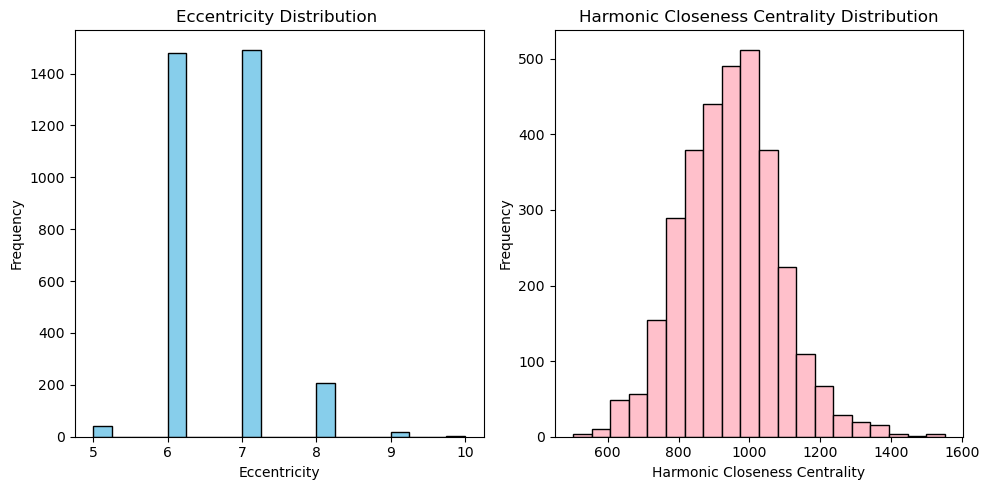

In [7]:
giant_component = max(nx.strongly_connected_components(G), key=len)
G_giant = G.subgraph(giant_component)

# Calculate eccentricity and harmonic closeness centrality for the giant component
eccentricities = nx.eccentricity(G_giant)
harmonic_closeness = nx.harmonic_centrality(G_giant, distance="inverse")

# Plotting eccentricity distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(list(eccentricities.values()), bins=20, color="skyblue", edgecolor="black")
plt.title("Eccentricity Distribution ")
plt.xlabel("Eccentricity")
plt.ylabel("Frequency")

# Plotting harmonic closeness centrality distribution
plt.subplot(1, 2, 2)
plt.hist(list(harmonic_closeness.values()), bins=20, color="pink", edgecolor="black")
plt.title("Harmonic Closeness Centrality Distribution")
plt.xlabel("Harmonic Closeness Centrality")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Eccentricity - Eccentricity of a node in a graph is defined as the maximum distance from that node to any other node in the graph. It's essentially the longest shortest path from the node to any other node. $$ e(v)=max_{u∈V} d(v,u)$$

Giant component is used in order to observe longest connected nodes. The maximum distance between nodes lies between 5 to 10( for most nodes) with highest frequency for eccentricity is 7 nodes. As the graph is directed at initial point, we have to convert it into undirected to get resulted graph plots. High eccentricity indicates that a node is relatively far from other nodes. It helps identify nodes that are on the periphery of the network.


Harmonic closeness centrality - Closeness centrality measures how close a node is to all other nodes in the graph. Harmonic closeness centrality is a variation of closeness centrality that considers the harmonic mean of the distances. High harmonic closeness centrality indicates that a node is close to many other nodes in a harmonic sense, considering the inverse of distances. It identifies nodes that can efficiently spread information to other nodes.$$
C_H(v)= n-1/(∑_{u !=v}1/ (d_{(u,v)})) $$
A node with a higher harmonic closeness centrality is considered more central in terms of facilitating communication within the network.

### a) (5 marks) Generate a sequence of Barabasi-Albert networks and plot their average clustering  coefficient against the number of nodes. Is this the behaviour of a real network? Explain your  reasoning. Explain also what kind of information the clustering coefficient gives about a network. Note: you should choose the appropriate parameters (number of nodes, repetitions etc) for your  sequence and your plot in order to provide enough information to support your conclusions.


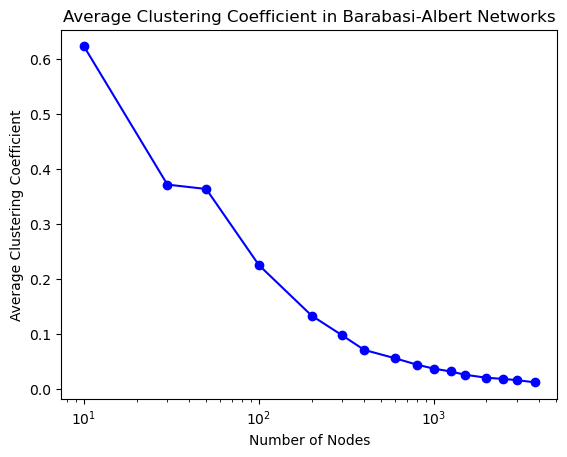

In [14]:
import networkx as nx
import matplotlib.pyplot as plt


# Barabasi-Albert network and calculate its average clustering coefficient
def generate_barabasi_albert_network(num_nodes, m, seed=None):
    G = nx.barabasi_albert_graph(num_nodes, m, seed=seed)
    avg_clustering = nx.average_clustering(G)
    return avg_clustering


m = 3  # The number of edges to attach from a new node to existing nodes
random_seed = 230293944

# Barabasi-Albert networks and their average clustering coefficients
num_nodes_list = [
    10,
    30,
    50,
    100,
    200,
    300,
    400,
    600,
    800,
    1000,
    1250,
    1500,
    2000,
    2500,
    3000,
    3783,
]
repetitions = 50  # Number of repetitions for each num_nodes value
avg_clustering_list = []

for num_nodes in num_nodes_list:
    avg_clustering_sum = 0
    for _ in range(repetitions):
        avg_clustering = generate_barabasi_albert_network(
            num_nodes, m, seed=random_seed
        )
        avg_clustering_sum += avg_clustering
    avg_clustering_list.append(avg_clustering_sum / repetitions)

# Graph Plot
plt.plot(num_nodes_list, avg_clustering_list, marker="o", linestyle="-", color="b")
plt.title("Average Clustering Coefficient in Barabasi-Albert Networks")
plt.xlabel("Number of Nodes")
plt.ylabel("Average Clustering Coefficient")
plt.xscale("log")  # Using a logarithmic scale for better visualization
plt.show()

Yes,this is a real network behaviour. We can observe in the graph that The clustering coefficient is a measure of the extent to which nodes in a network tend to cluster together. Once the number of nodes are increasing, the average clustering coefficient shows inverse relation and dipping down to the x-axis. $$C(v)= (possible \ number \ of \ edges \ between \ neighbors \ of \ v)\ / \ (number \ of \ edges \ between \ neighbors \ of \ v)$$ 

As we know for Barabasi model, higher the degree of nodes, higher the chances of new node to get attached to it.

### b) (5 marks) Generate 200 Watts-Strogatz networks with 200 nodes and 200 links for each value of  the probability of rewiring in the following list 𝑝𝑑 = ( 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0) and  plot the change in degree assortativity against the rewiring probability. Each point of your plot needs  to be the average value over the 200 generated networks. Analyse what is happening with the  assortativity and explain the reason for this result

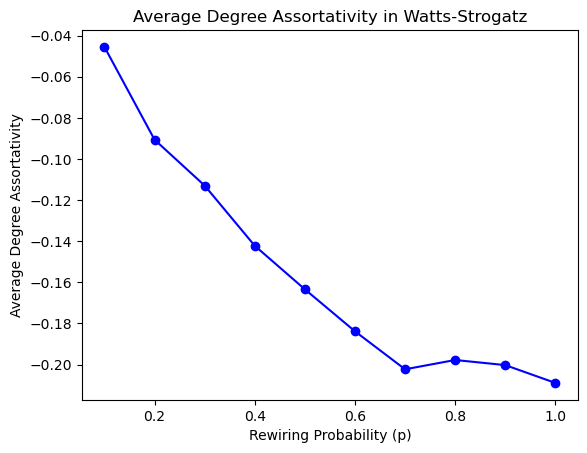

In [9]:
import matplotlib.pyplot as plt

num_nodes = 200
num_links = 200
rewire_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_networks = 200
seed_value = 230293944


avg_degree_assortativity_list = []  # Initialize lists to store results

# for loop used here for rewiring probability
for p in rewire_values:
    num_assortativity = []  # List to store assortativity for each network

    # Loop over the number of networks
    for _ in range(num_networks):
        # Watts-Strogatz graph
        G = nx.watts_strogatz_graph(num_nodes, k=2, p=p, seed=seed_value)

        # Calculate degree assortativity
        degree_assortativity = nx.degree_assortativity_coefficient(G)
        num_assortativity.append(degree_assortativity)

        seed_value += 1  # Increment seed for the next network

    # Calculate average degree assortativity for the current rewiring probability
    avg_degree_assortativity = np.mean(num_assortativity)
    avg_degree_assortativity_list.append(avg_degree_assortativity)

# Plot the results
plt.plot(
    rewire_values, avg_degree_assortativity_list, marker="o", linestyle="-", color="b"
)
plt.title("Average Degree Assortativity in Watts-Strogatz")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Average Degree Assortativity")
plt.show()

In order to under the result, we first need to know what is assortativity coefficient
assortativity coefficient = Measures the preference of a network's nodes to attach to others that are similar in some way. A positive assortativity coefficient indicates that nodes tend to connect to nodes with similar degrees.

$$r = \frac{\sum_{jk}{jk (e_{jk} - q_j q_k)}}{\sigma_{q}^{2}}. $$

The graph is in such manner as it keep dipping to negative degree assortativity as it approaches to 1 rewiring probability and the way new node are attached, it is affecting degree assortativity. A negative assortativity in the context of Watts-Strogatz networks indicates a trend where nodes tend to connect to others with different degrees. Negative assortativity implies that high-degree nodes are more likely to connect to low-degree nodes and vice versa. 
 - As the rewiring probability approaches 1, more edges are rewired, leading to a higher possibility of nodes connecting to random neighbors. This process reduces the structural order observed in regular networks, contributing to the decrease in assortativity.


### c) (6 marks) Ask ChatGPT to list and define the 3 main properties of real networks with whatever  prompt you think makes it work better. Explain the differences between its answer and what we learned in our module by providing all details and mathematical definitions. Note: you will not receive any marks by copying and pasting ChatGPT’s answer. Marks will only be awarded to your analysis of it

The 3 main properties of real networks according to ChatGPT:
1. Small World Phenomenon: The small-world phenomenon refers to the idea that most nodes in a network can be reached from every other by a small number of steps, even in large networks. Mathematically, it is often characterized by a low average shortest path length.

2. Scale-Free Network: Scale-free networks exhibit a degree distribution that follows a power-law, meaning there are a few highly connected hubs while most nodes have few connections. Mathematically, the degree distribution , $$  P(k) ∼ k^{-γ}$$
where γ is a constant


3. Clustering Coefficient: The clustering coefficient measures the degree to which nodes in a network tend to cluster together. It is the ratio of the number of triangles formed by nodes over the number of possible triangles. Mathematically, for a node i with degree ki and ni neighbors, the clustering coefficient Ci is defined as $$Ci = 2 * number \ of \ edges \ between \ n_i  \ neighbors \ of \ node\  i / (k_i * (k_i - 1))$$




On contrary to that, What we learn in the module are as follow : 

1. Small World -  A network model has the small world property when the average distance increases less than logarithmically with the number of nodes.
- The relation between the average distance of the network and its number of nodes depends on the model of network.
- Networks with the small world property are called small world networks.
- |When only one network is available, the average distance is an indication, but not a rigorous proof that the network has the small-world property. In this case, one compares the average distance with the logarithm of the number of nodes and, if the latter is of the order or smaller than the former, one says that it is an indication that the network has the property.
    
    We learn 2 different topologies in small world: 
    
    1. Square grid topology - A square grid topology is a network arrangement where nodes are organized in a regular two-dimensional grid pattern, resembling the layout of a chessboard or a matrix.
    $$ 𝑑 = sqrt(N) $$
    
    2. Random 𝑮 𝑵, 𝒑 with fixed k -
    
    $$ d = ln(N)/ln(K) $$
    
    Here, we can clearly observe that in chatGPT answer, it does not define for different topologies and the definition is quite broad. In module, we have learn in details about the small world and how small world works on different topology( square grid and G(n,p).
    
2. Scale free network - A scale-free network is a connected graph or network with the property that the number of links k originating from a given node exhibits a power law distribution $$P(k)∼k^{-γ}$$ A scale-free network can be constructed by progressively adding nodes to an existing network and introducing links to existing nodes with preferential attachment so that the probability of linking to a given node i is proportional to the number of existing links k_i that node has. A scale-free network will have a degree distribution that follows a Power law and/or has a long tail — that is, there are a few, but a significant number of nodes that have many connections (hubs), while most nodes in the network have significantly fewer connections. Scale free network specifically works on power law. 
    - Weak Scale-Free: any power law
    - Strong Scale-Free: power laws with 𝟐 < 𝜸 ≤ 𝟑.



3. Clustering Coefficient -  the maximum number of possible links connecting its neighbours and Li is the observed number of such links. The clustering coefficient is a measure of how well-connected are the neighbours of a certain node.The clustering coefficient is maximised when the node and its neighbours form a clique of the network and minimised when the neighbours of the node do not have any connection between them. $$ Ci = L_i/ L^m = 2L_i /(k_i(k_i −1)), k_i ≥ 2,m = max $$   $$𝐿_𝑖  = (𝑘_𝑖( 𝑘_𝑖 − 1))/2$$ For a single network, the average clustering coefficient is obtained by averaging Ci over all nodes $$ C_i¯ = 1/N ({∑_i C_i})$$ 

 Clustering on Different Network Topologies:
    K-Regular Circle: $$𝐶 = 3(𝑘 − 2)/ 4(𝑘 − 1) $$ 
   Random G(N,p) with fixed : $$ C = k /(N-1) $$ 
    
Here, we can observe that in ChatGPT give explaination in terms of number of triangle it forms whereas in module, we learn that actual number of links in neighbours with respect to maximum links with neighbours.



REFERENCES

https://mathworld.wolfram.com/Scale-FreeNetwork.html

https://support.noduslabs.com/hc/en-us/articles/4402048501266-Types-of-Networks-Scale-Free-Power-Law-and-Degree-Distribution

### d) (4 marks) Show indication that the degree distribution of the 𝐺(𝑁, 𝐿) model can be approximated by a Gaussian for large 𝑁 numerically by working out one example. You have to implement some method to show that it is the case, not derive any analytical equations. The comparison should be made simply by plotting the two distributions in the same figure

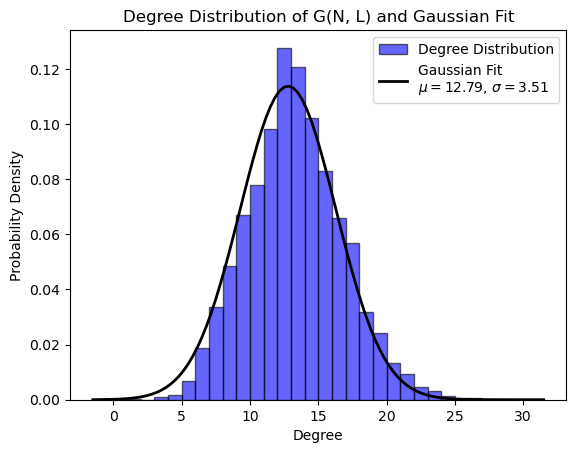

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


def plot_degree_distribution(N, L, seed_graph=None, seed_sampling=None):
    G = nx.gnm_random_graph(N, L, seed=seed_graph)  # Random G(N,L) graph generated
    degrees = list(dict(G.degree()).values())  # Converting the degrees to a list

    # Histogram for degree distribution
    plt.hist(
        degrees,
        bins=np.arange(0, 31, 1),
        density=True,
        alpha=0.6,
        color="b",
        label="Degree Distribution",
        edgecolor="Black",
    )

    # Gaussian distribution to the data
    mu, std = norm.fit(degrees)
    xmin, xmax = plt.xlim()  # use to set limits for x(min-max)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # normilization density function for data

    # Gaussian distribution
    plt.plot(
        x,
        p,
        "k",
        linewidth=2,
        label=f"Gaussian Fit\n$\mu={mu:.2f}$, $\sigma={std:.2f}$",
    )

    plt.title("Degree Distribution of G(N, L) and Gaussian Fit")
    plt.xlabel("Degree")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()


N = 3783
L = 24186
seed_graph = 230293944
seed_sampling = 230293944

# G(N, L) model and degree distribution
plot_degree_distribution(N, L, seed_graph=seed_graph, seed_sampling=seed_sampling)